# The Probability of surviving the Titanic

### Imports


In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix

### Reading the Data

In [2]:
df = pd.read_csv('titanic.csv')

### Take useful features

In [3]:
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']
df_x = df[features]
df_y = df['Survived']

### Fix problematic data values

In [4]:
# Convert gender to numeric

df_x['Sex'] = df_x['Sex'].map({'male': 0, 'female': 1})

# Fill missing ages with median
df_x['Age'] = df_x['Age'].fillna(df_x['Age'].median())


### Train/Test Split

In [5]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_y, test_size=0.2, random_state=42)


### Scale features

In [6]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_x.values)
X_test_scaled = scaler.transform(test_x.values)

### K-Nearest Neighbor Training

In [7]:
k = 5

knn = KNeighborsClassifier(n_neighbors= k)
knn.fit(X_train_scaled, train_y)


KNeighborsClassifier()

### Accuracy evaluation



In [8]:
test_y_predictions = knn.predict(X_test_scaled)

print(f"Accuracy: {accuracy_score(test_y, test_y_predictions):.2f}")

Accuracy: 0.79


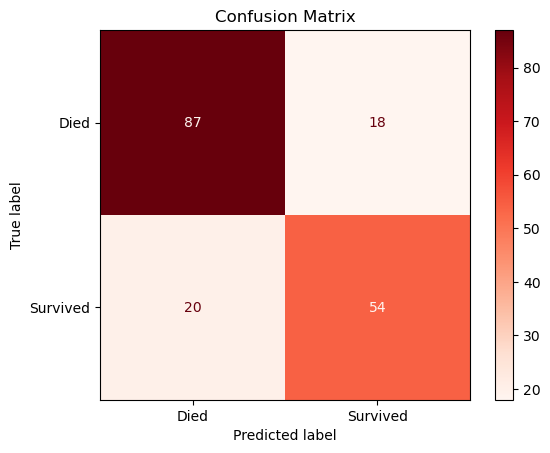

In [9]:
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(test_y, test_y_predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=['Died', 'Survived'])
disp.plot(cmap='Reds')
plt.title('Confusion Matrix')
plt.show()

### Simple prediction example

In [10]:
example_passenger = [[3, 0, 25, 7.25, 0, 0]]  # 3rd class male, age 25
example_scaled = scaler.transform(example_passenger)
print(f"Survival prediction: {'Yes' if knn.predict(example_scaled)[0] else 'No'}")

Survival prediction: No
